In [24]:
import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv('/content/mcdonalds.csv')

In [25]:
# Display the column names
print(mcdonalds.columns)
print(mcdonalds.shape)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)


In [ ]:
# Display the dimensions
print(mcdonalds.shape)

In [26]:
# Display the first five rows
print(mcdonalds.head(5))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  
3        Yes    4   69         Once a week  Female  
4         No    2   49        Once a month    Male  


In [27]:
# Convert "Yes" to 1 and "No" to 0 for the first 11 columns
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)


<ipython-input-27-c16fcbeb3bb9>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)


In [28]:
# Check the transformed data
print(MD_x.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  
3        0           1  
4        1           0  


In [30]:
# Calculate the column means
col_means = MD_x.mean().round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


Explained variance ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative variance: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


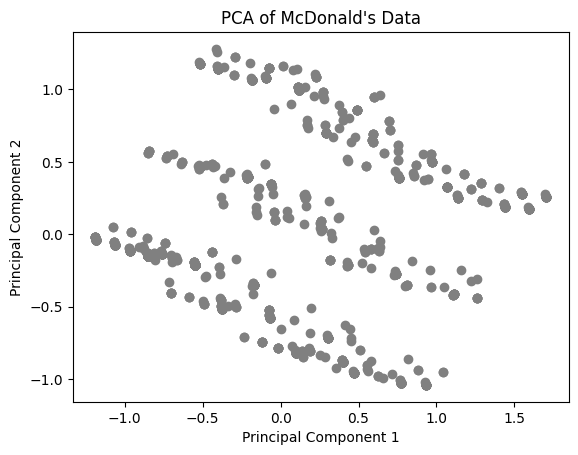

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Display explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Print the cumulative variance explained by each component
print("Cumulative variance:", explained_variance.cumsum())

# Plot the first two principal components
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonald\'s Data')
plt.show()


In [21]:
!pip install bioinfokit


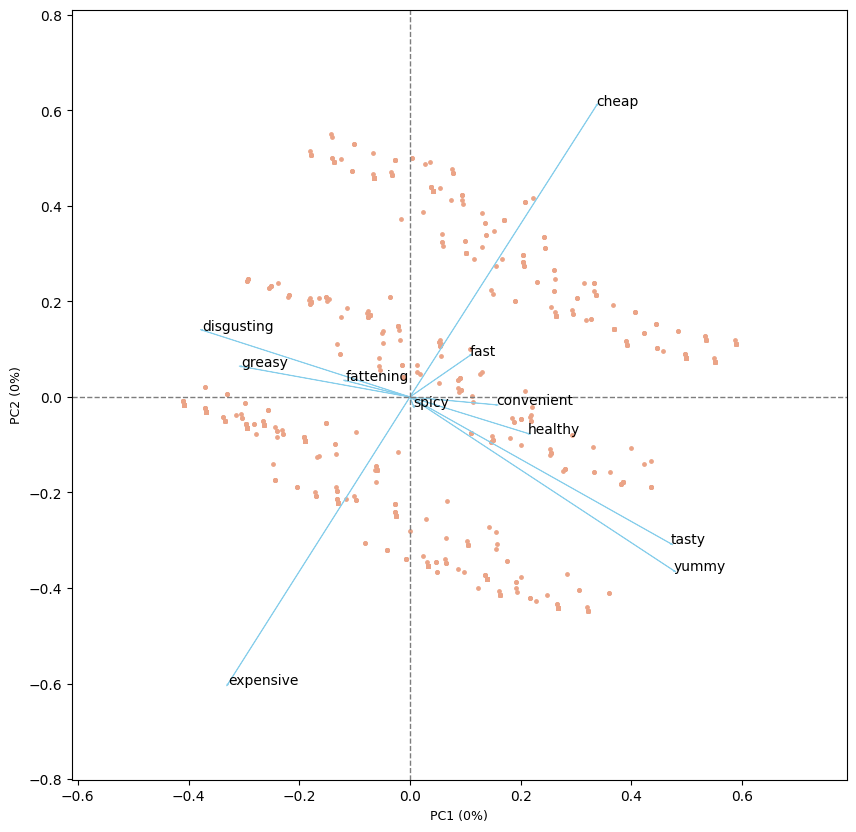

In [32]:
from bioinfokit.visuz import cluster
load = pca.components_
data = mcdonalds
cluster.biplot(cscore=MD_pca, loadings=-load, labels=data.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

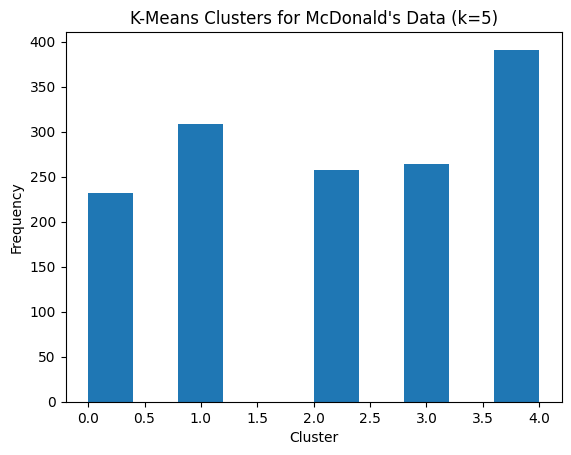

In [46]:
from sklearn.cluster import KMeans

# Perform k-means clustering for k values from 2 to 8
kmeans_models = {}
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
    kmeans.fit(MD_x)
    kmeans_models[k] = kmeans

# Choose the best model (for example, k=4)
k5 = kmeans_models[5]

# Add the cluster labels to the original data
mcdonalds['Cluster'] = k5.labels_

# Plot the clusters
plt.hist(k4.labels_, bins=10)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('K-Means Clusters for McDonald\'s Data (k=5)')
plt.show()


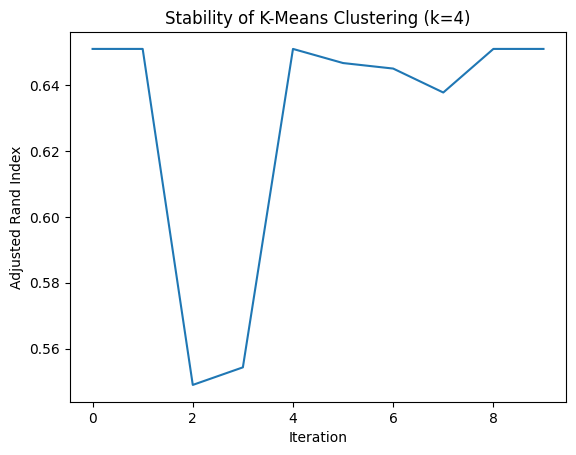

In [47]:
from sklearn.metrics import adjusted_rand_score

# Compute the adjusted Rand index to measure stability across multiple runs
stabilities = []
for i in range(10):
    kmeans_stable = KMeans(n_clusters=4, random_state=i, n_init=10)
    labels_stable = kmeans_stable.fit_predict(MD_x)
    score = adjusted_rand_score(k4.labels_, labels_stable)
    stabilities.append(score)

# Plot the stability (Adjusted Rand Index)
plt.plot(stabilities)
plt.xlabel('Iteration')
plt.ylabel('Adjusted Rand Index')
plt.title('Stability of K-Means Clustering (k=4)')
plt.show()


In [48]:
from sklearn.mixture import GaussianMixture

# Fit a Gaussian Mixture Model for k=4
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)

# Compare K-means and GMM clusters
gmm_labels = gmm.predict(MD_x)
print(pd.crosstab(mcdonalds['Cluster'], gmm_labels))


col_0      0    1    2    3
Cluster                    
0          1  212   11    3
1        260    4    3   42
2          0   33    0  221
3        358    0    1   32
4          2    5  262    3


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a reversed "Like" variable
mcdonalds['Like.n'] = 6 - mcdonalds['Like'].str.extract('(\d+)').astype(int)

# Prepare the data for regression
X = MD_x  # The first 11 binary columns
y = mcdonalds['Like.n']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Fit the regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate the model
print("Regression model score (R^2):", reg.score(X_test, y_test))


Regression model score (R^2): 0.11238563913772615


<ipython-input-50-c410bf07729c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tree['VisitFrequency'] = le.fit_transform(X_tree['VisitFrequency'])
<ipython-input-50-c410bf07729c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tree['Gender'] = le.fit_transform(X_tree['Gender']) # Encode the 'Gender' column


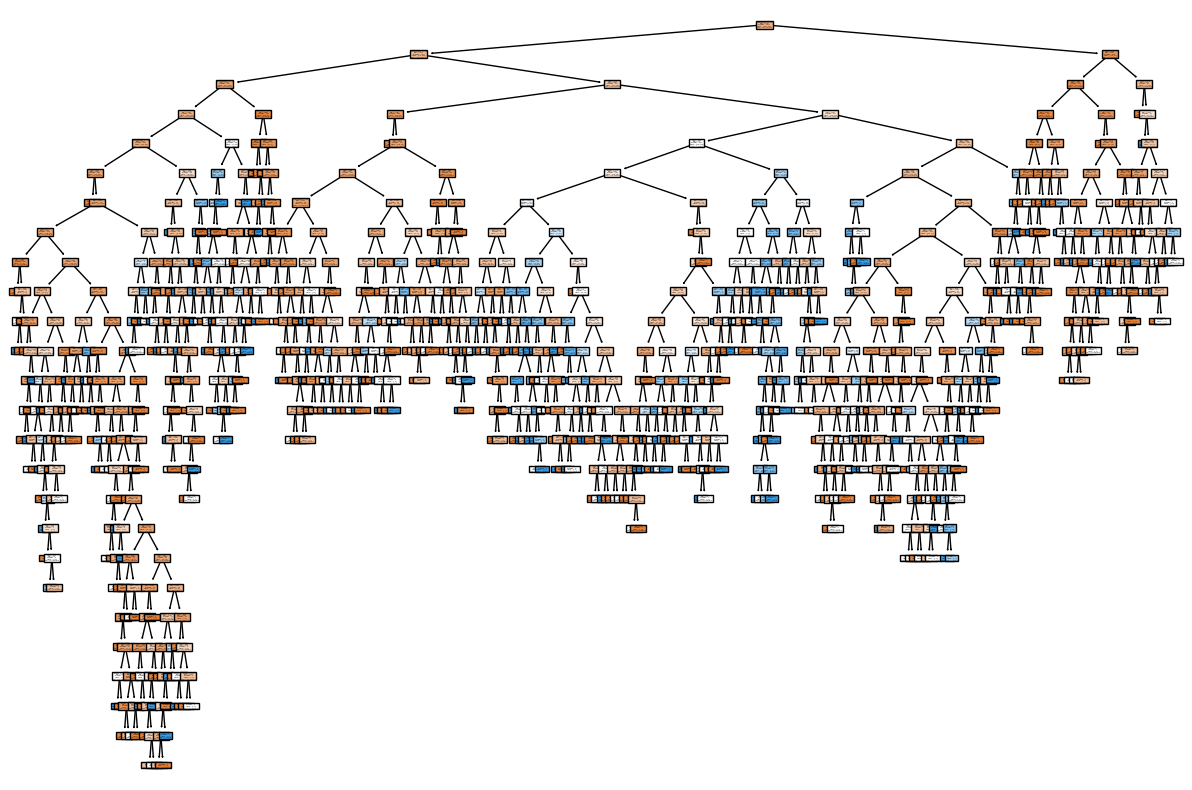

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Prepare the data for the decision tree
features = ['Like.n', 'Age', 'VisitFrequency', 'Gender']
X_tree = mcdonalds[features]
y_tree = (mcdonalds['Cluster'] == 3).astype(int)  # Target: Is the customer in cluster 3?

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'VisitFrequency' column
X_tree['VisitFrequency'] = le.fit_transform(X_tree['VisitFrequency'])

# Fit and transform the 'Gender' column
X_tree['Gender'] = le.fit_transform(X_tree['Gender']) # Encode the 'Gender' column

# Fit the decision tree
clf = DecisionTreeClassifier(random_state=1234)
clf.fit(X_tree, y_tree)

# Plot the tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=features, class_names=['Not Cluster 3', 'Cluster 3'])
plt.show()


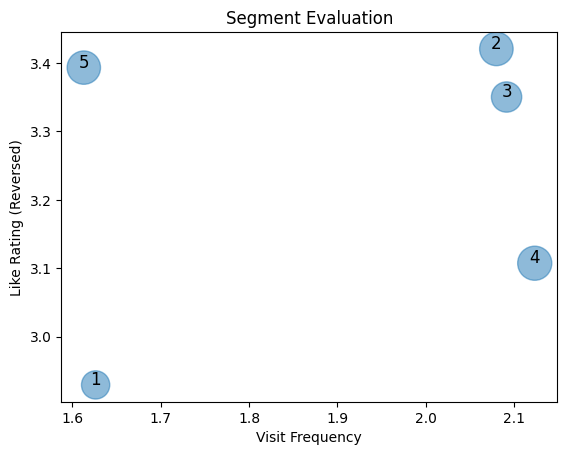

In [51]:
# Convert VisitFrequency to numeric values
visit_mapping = {
    "Every three months": 1,
    "Once a month": 2,
    "Once a week": 3,
    "More than once a week": 4
}

mcdonalds['VisitFrequency'] = mcdonalds['VisitFrequency'].map(visit_mapping)

# Group by cluster to calculate means
visit_means = mcdonalds.groupby('Cluster')['VisitFrequency'].mean()
like_means = mcdonalds.groupby('Cluster')['Like.n'].mean()
female_ratio = mcdonalds.groupby('Cluster')['Gender'].apply(lambda x: (x == 'Female').mean())  # Ratio of females

# Bubble plot for visualizing segments
plt.scatter(visit_means, like_means, s=1000 * female_ratio, alpha=0.5)
for i in range(len(visit_means)):
    plt.text(visit_means.iloc[i], like_means.iloc[i], str(i+1), fontsize=12, ha='center')
plt.xlabel('Visit Frequency')
plt.ylabel('Like Rating (Reversed)')
plt.title('Segment Evaluation')
plt.show()
